In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv(r"/content/drive/MyDrive/Linear_Regression/train.csv")

In [7]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [8]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [9]:
unnecessary_columns = ['Customer ID', 'Name', 'Property ID']
df.drop(columns=unnecessary_columns, inplace=True)

In [10]:
df

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,...,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,...,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,...,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,...,2.0,869.61,0,Unpossessed,4969.41,4,Urban,1,111096.56,68992.11
29996,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,...,3.0,729.41,0,Inactive,1606.88,3,Urban,1,73453.94,46616.60
29997,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,583.11,N,...,NaN,NaN,0,Active,NaN,1,Rural,1,102108.02,61057.56
29998,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,378.29,N,...,3.0,677.27,1,Unpossessed,2417.71,4,Urban,1,168194.47,99766.87


In [11]:
df.columns

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Expense Type 1', 'Expense Type 2',
       'Dependents', 'Credit Score', 'No. of Defaults',
       'Has Active Credit Card', 'Property Age', 'Property Type',
       'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')

In [12]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values[missing_values > 0])


Missing values:
 Type of Employment             7270
Property Age                   4850
Income (USD)                   4576
Dependents                     2493
Credit Score                   1703
Income Stability               1683
Has Active Credit Card         1566
Property Location               356
Loan Sanction Amount (USD)      340
Current Loan Expenses (USD)     172
Gender                           53
dtype: int64


In [13]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
df.select_dtypes(include='object').isnull().sum()

,0
Gender,0
Income Stability,0
Profession,0
Type of Employment,0
Location,0
Expense Type 1,0
Expense Type 2,0
Has Active Credit Card,0
Property Location,0


In [15]:
df.select_dtypes(include='number').isnull().sum()

,0
Age,0
Income (USD),4576
Loan Amount Request (USD),0
Current Loan Expenses (USD),172
Dependents,2493
Credit Score,1703
No. of Defaults,0
Property Age,4850
Property Type,0
Co-Applicant,0


In [16]:
df['Income (USD)']=df['Income (USD)'].fillna(df['Income (USD)'].mean())


In [17]:
df['Current Loan Expenses (USD)']=df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].mean())

In [18]:
df['Credit Score']=df['Credit Score'].fillna(df['Credit Score'].mean())

In [19]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].median())

In [20]:
df['Property Age']=df['Property Age'].fillna(df['Property Age'].median())

In [21]:
df = df.dropna(subset=['Loan Sanction Amount (USD)'])
df = df[df['Loan Sanction Amount (USD)'] >= 0]


In [22]:
df.select_dtypes(include='number').isnull().sum()

,0
Age,0
Income (USD),0
Loan Amount Request (USD),0
Current Loan Expenses (USD),0
Dependents,0
Credit Score,0
No. of Defaults,0
Property Age,0
Property Type,0
Co-Applicant,0


In [23]:
len(df)

29322

In [24]:
from sklearn.preprocessing import LabelEncoder
categorical_columns=df.select_dtypes(include='object').columns
label_encoder=LabelEncoder()
for col in categorical_columns:
  df[col]=label_encoder.fit_transform(df[col])

In [25]:
df.select_dtypes(include='number').columns

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Expense Type 1', 'Expense Type 2',
       'Dependents', 'Credit Score', 'No. of Defaults',
       'Has Active Credit Card', 'Property Age', 'Property Type',
       'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_to_scale = [
    'Age', 'Current Loan Expenses (USD)', 'Property Price',
    'No. of Defaults', 'Credit Score', 'Income (USD)',
    'Loan Amount Request (USD)', 'Property Age'
]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [27]:
df

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,0,0.989123,-0.066629,1,7,14,1,-0.268548,-0.662682,0,...,3.0,0.991778,-0.490582,0,-0.060461,4,0,1,-0.126245,54607.18
1,1,-0.505765,0.221373,1,7,8,1,-0.705283,0.393397,0,...,1.0,0.577622,-0.490582,2,0.227543,2,0,1,-0.823984,37469.98
2,0,1.549706,-0.156740,0,3,8,1,-0.726209,-0.949286,0,...,1.0,1.329921,-0.490582,2,-0.150572,2,2,0,-0.634940,36474.43
3,0,1.549706,-0.000107,0,3,8,0,-0.146663,-0.424460,0,...,2.0,1.323503,2.038397,2,-0.032784,2,1,1,-0.110092,56040.54
4,0,-0.568052,-0.001614,1,7,6,1,0.421718,0.375155,0,...,2.0,0.080605,2.038397,0,0.004555,4,1,1,0.823116,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,-0.132043,0.222947,1,1,10,2,-0.203837,1.332562,1,...,2.0,1.849899,-0.490582,2,0.229117,4,2,1,-0.220897,68992.11
29996,1,-1.253209,-0.097736,1,7,8,1,-0.373047,-0.613097,0,...,3.0,-0.149577,-0.490582,1,-0.091567,3,2,1,-0.624086,46616.60
29997,0,0.553114,-0.000107,1,7,14,2,-0.123926,0.755332,0,...,2.0,-0.000181,-0.490582,0,-0.032784,1,0,1,-0.317173,61057.56
29998,1,-0.132043,-0.020407,1,7,16,1,0.903739,-0.093826,0,...,3.0,-0.893176,2.038397,2,-0.014239,4,2,1,0.390677,99766.87


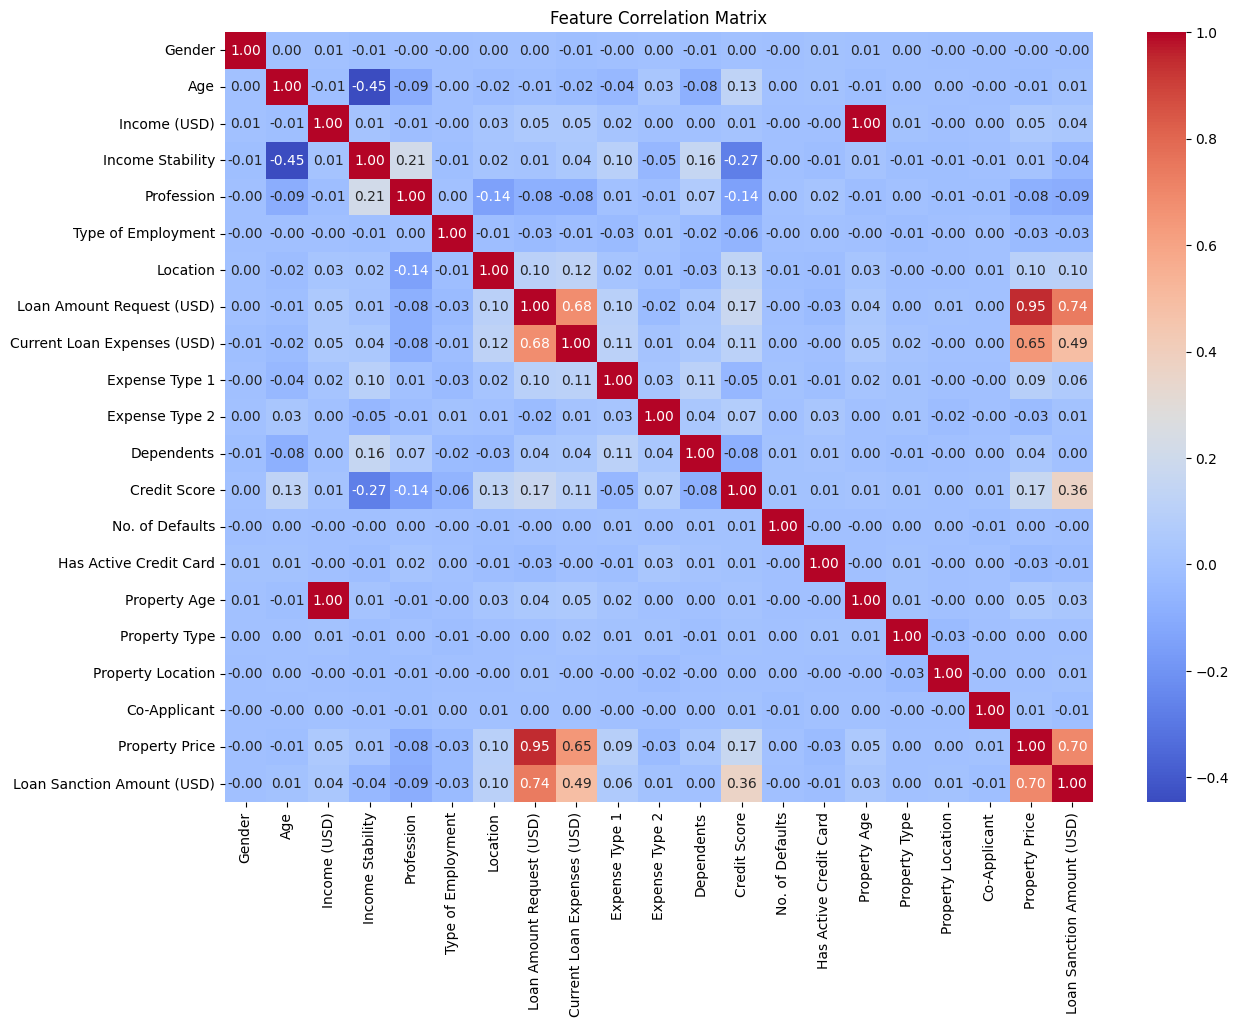

In [28]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
X=df.drop('Loan Sanction Amount (USD)',axis=1)
y=df['Loan Sanction Amount (USD)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 888839805.45
Mean Absolute Error (MAE): 20673.83
Root Mean Squared Error (RMSE): 29813.42
R-squared (R2) Score: 0.60


In [31]:
n = X_test.shape[0] # Number of observations
p = X_test.shape[1] # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared: {adjusted_r2:.2f}")


Adjusted R-squared: 0.60


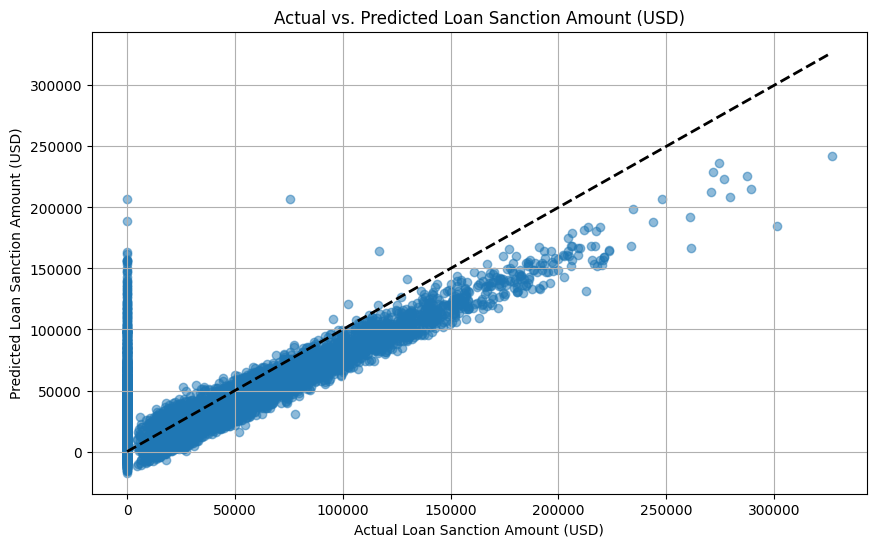

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Loan Sanction Amount (USD)")
plt.ylabel("Predicted Loan Sanction Amount (USD)")
plt.title("Actual vs. Predicted Loan Sanction Amount (USD)")
plt.grid(True)

# Add the ideal line (where actual = predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

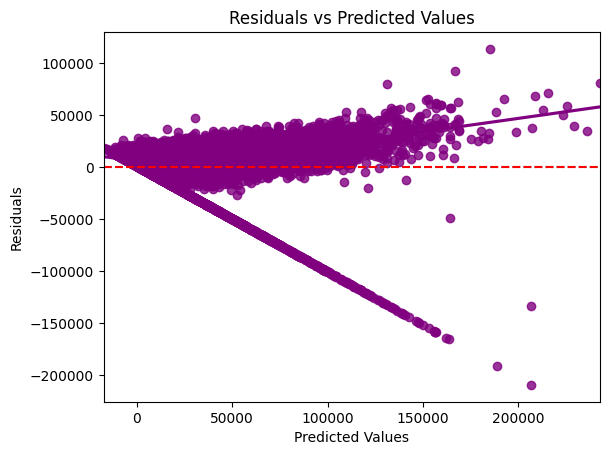

In [33]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, color="purple")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(0, color='red', linestyle='--')
plt.show()

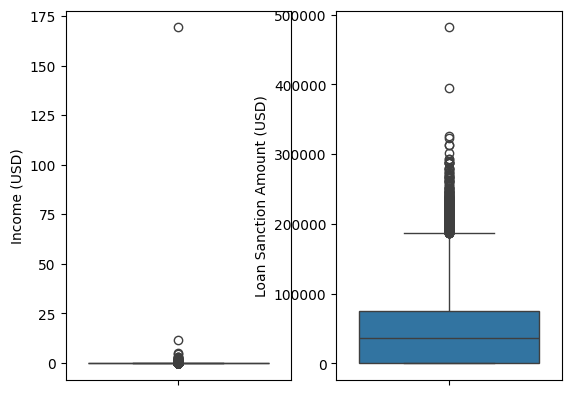

In [34]:
plt.subplot(1,2,1)
sns.boxplot(y=df['Income (USD)'])
plt.subplot(1,2,2)
sns.boxplot(y=df['Loan Sanction Amount (USD)'])
plt.show()

In [35]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}:")

    # Split data into train and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lr.predict(X_test)

    # Calculate evaluation metrics for the current fold
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append scores to the lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(mae)
    r2_scores.append(r2)

    # Print metrics for the current fold
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.2f}")
    print("-" * 20)

# Calculate and print the average metrics across all folds
print("Average Metrics Across All Folds:")
print(f"  Average MSE: {np.mean(mse_scores):.2f}")
print(f"  Average MAE: {np.mean(mae_scores):.2f}")
print(f"  Average RMSE: {np.mean(rmse_scores):.2f}")
print(f"  Average R2 Score: {np.mean(r2_scores):.2f}")

Fold 1:
  MSE: 888839805.45
  MAE: 20673.83
  RMSE: 29813.42
  R2 Score: 0.60
--------------------
Fold 2:
  MSE: 975122906.27
  MAE: 21287.99
  RMSE: 31226.96
  R2 Score: 0.58
--------------------
Fold 3:
  MSE: 1113738141.81
  MAE: 21140.11
  RMSE: 33372.72
  R2 Score: 0.54
--------------------
Fold 4:
  MSE: 961469520.70
  MAE: 20844.38
  RMSE: 31007.57
  R2 Score: 0.59
--------------------
Fold 5:
  MSE: 927806905.41
  MAE: 20857.03
  RMSE: 30459.92
  R2 Score: 0.59
--------------------
Average Metrics Across All Folds:
  Average MSE: 973395455.93
  Average MAE: 20960.67
  Average RMSE: 20960.67
  Average R2 Score: 0.58


In [36]:
# Calculate R-squared on the training set
y_train_pred = lr.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# R-squared on the test set (already calculated in a previous step)
# r2_test = r2_score(y_test, y_pred)

print(f"R-squared on Training Set: {r2_train:.2f}")
print(f"R-squared on Test Set: {r2:.2f}")

# You can compare these two values to assess for underfitting or overfitting.
# A significant difference (training much higher than test) suggests overfitting.
# Low scores on both suggest underfitting.

R-squared on Training Set: 0.61
R-squared on Test Set: 0.59


In [49]:
from sklearn.model_selection import cross_val_score

Laso Regression


In [37]:
from sklearn.linear_model import Lasso

In [57]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [39]:
ls=Lasso(alpha=0.1)
ls.fit(X_train,y_train)
y_pred=ls.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+13, tolerance: 5.475e+09
  model = cd_fast.enet_coordinate_descent(


In [58]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 927878693.76
Mean Absolute Error (MAE): 20857.17
Root Mean Squared Error (RMSE): 30461.10
R-squared (R2) Score: 0.59


In [59]:
cv=cross_val_score(ls,X,y,cv=5)

In [60]:
print(cv)
mse_scores = cross_val_score(ls, X, y, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE to positive MSE
mse_scores = -mse_scores

# Calculate cross-validation scores for MAE
mae_scores = cross_val_score(ls, X, y, cv=5, scoring='neg_mean_absolute_error')
# Convert negative MAE to positive MAE
mae_scores = -mae_scores



print("MSE for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("\nMAE for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))


[0.58406101 0.58837314 0.5850459  0.58916441 0.62820088]
MSE for each fold: [9.69580972e+08 9.33053044e+08 9.36953116e+08 9.61784586e+08
 9.01121220e+08]
Mean MSE: 940498587.4652227

MAE for each fold: [21136.37097845 20924.4375895  21056.1615328  20912.71393432
 20722.99722108]
Mean MAE: 20950.53625122989


Rigid Regression

In [45]:
from sklearn.linear_model import Ridge

In [46]:
rid=Ridge(alpha=0.1)
rid.fit(X_train,y_train)
y_pred=rid.predict(X_test)

In [47]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 927878693.76
Mean Absolute Error (MAE): 20857.17
Root Mean Squared Error (RMSE): 30461.10
R-squared (R2) Score: 0.59


In [61]:
cv=cross_val_score(rid,X,y,cv=5)

In [62]:
print(cv)
mse_scores = cross_val_score(ls, X, y, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE to positive MSE
mse_scores = -mse_scores

# Calculate cross-validation scores for MAE
mae_scores = cross_val_score(ls, X, y, cv=5, scoring='neg_mean_absolute_error')
# Convert negative MAE to positive MAE
mae_scores = -mae_scores



print("MSE for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("\nMAE for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))

[0.58662204 0.59043079 0.58796766 0.5891561  0.62870643]
MSE for each fold: [9.69580972e+08 9.33053044e+08 9.36953116e+08 9.61784586e+08
 9.01121220e+08]
Mean MSE: 940498587.4652227

MAE for each fold: [21136.37097845 20924.4375895  21056.1615328  20912.71393432
 20722.99722108]
Mean MAE: 20950.53625122989


In [72]:
from sklearn.svm import SVR
ss=SVR(kernel='linear')
ss.fit(X_train,y_train)
y_pred=ss.predict(X_test)


In [73]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 1123774211.87
Mean Absolute Error (MAE): 23752.66
Root Mean Squared Error (RMSE): 33522.74
R-squared (R2) Score: 0.51
